In [2]:
# Import necessary module
from sqlalchemy import create_engine
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
# Create engine: engine
engine = create_engine('sqlite:///programming.sqlite')

In [4]:
# What are the tables in the database?

# Save the table names to a list: table_names
table_names  = engine.table_names()

# Print the table names to the shell
print(table_names)

# See the data model here: http://chinookdatabase.codeplex.com/wikipage?title=Chinook_Schema&referringTitle=Home


['Grade']


In [5]:
# The power of SQL lies in relationships between tables: INNER JOIN

# Execute query and store records in DataFrame: df
df = pd.read_sql_query("select * from Grade",engine)

# drop the unnecessary column
df = df.drop('index', 1)

# print the number of unique students
print(len(df['Aluno_ID'].unique()))

# Print head of DataFrame
df.head()


766


,Aluno_ID,Período,Disciplina,Situaçăo,Média Final,Unidade I,Unidade II,Unidade III
0,0,2014.1,IMD0012.0 - INTRODUÇĂO ŔS TÉCNICAS DE PROGRAMAÇĂO,APROVADO,7.0,4.9,9.0,7.0
1,1,2014.1,IMD0012.0 - INTRODUÇĂO ŔS TÉCNICAS DE PROGRAMAÇĂO,APROVADO,7.3,8.0,7.0,7.0
2,2,2014.1,IMD0012.0 - INTRODUÇĂO ŔS TÉCNICAS DE PROGRAMAÇĂO,APROVADO,9.3,9.5,8.3,10.0
3,3,2014.1,IMD0012.0 - INTRODUÇĂO ŔS TÉCNICAS DE PROGRAMAÇĂO,APROVADO,7.3,6.5,7.0,8.3
4,4,2014.1,IMD0012.0 - INTRODUÇĂO ŔS TÉCNICAS DE PROGRAMAÇĂO,APROVADO,7.5,5.5,8.0,9.0


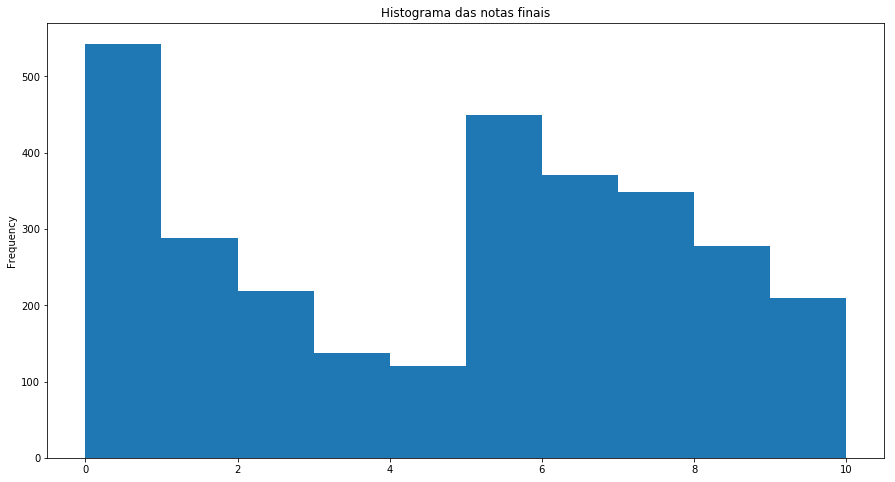

In [6]:
df["Média Final"].plot("hist", figsize=(15,8), title="Histograma das notas finais")

In [7]:
#print(df["Média Final"].describe().tolist())
#print(df["Média Final"].describe())
print(df["Situaçăo"].value_counts())

APROVADO                            838
APROVADO POR NOTA                   789
CANCELADO                           723
REPROVADO POR MÉDIA E POR FALTAS    461
REPROVADO                           441
TRANCADO                            108
DESISTENCIA                          67
CUMPRIU                              29
REPROVADO POR NOTA                   14
REPROVADO POR NOTA E FALTA            3
REPROVADO POR FALTAS                  2
INCORPORADO                           1
Name: Situaçăo, dtype: int64


In [8]:
df["Período"].unique()
df["Período"].value_counts()

mean = []
std = []
notamin = []
notamax = []
quartil1 = []
mediana = []
quartil3 = []
periodoNome = []
aprov = []
repro = []
for periodo in df["Período"].unique():
    df_periodo = df[df["Período"] == periodo]
    describe = df_periodo["Média Final"].describe().tolist()
    mean.append(describe[1])
    std.append(describe[2])
    notamin.append(describe[3])
    quartil1.append(describe[4])
    mediana.append(describe[5])
    quartil3.append(describe[6])
    notamax.append(describe[7])
    periodoNome.append(periodo)
   
d = {'mean': mean, 'std': std, 'notamin': notamin, 'quartil1': quartil1, 'mediana': mediana, 'quartil3': quartil3, 'notamax' : notamax, 'periodoNome' : periodoNome}
df2 = pd.DataFrame(data=d)
df2

,mean,mediana,notamax,notamin,periodoNome,quartil1,quartil3,std
0,3.583721,2.9,9.7,0.0,2014.1,1.000,6.375,3.075094
1,4.567617,5.1,10.0,0.0,2014.2,1.450,7.300,3.174186
2,5.134404,5.9,10.0,0.0,2015.1,2.200,7.700,3.124204
3,4.731163,5.5,10.0,0.0,2015.2,1.300,7.500,3.212839
4,4.170147,5.0,10.0,0.0,2016.1,1.400,6.400,2.828752
5,4.910260,5.4,10.0,0.0,2016.2,2.075,7.325,2.961670


In [11]:
mean = []
std = []
notamin = []
notamax = []
quartil1 = []
mediana = []
quartil3 = []
periodoNome = []
aprov = []
repro = []
nota = ["Unidade I", "Unidade II", "Unidade III", "Média Final"]
for periodo in nota:
    #df_periodo = df[df["Período"] == periodo]
    describe = df_periodo[str(periodo)].describe().tolist()
    mean.append(describe[1])
    std.append(describe[2])
    notamin.append(describe[3])
    quartil1.append(describe[4])
    mediana.append(describe[5])
    quartil3.append(describe[6])
    notamax.append(describe[7])
    periodoNome.append(periodo)
   
d = {'mean': mean, 'std': std, 'notamin': notamin, 'quartil1': quartil1, 'mediana': mediana, 'quartil3': quartil3, 'notamax' : notamax, 'periodoNome' : periodoNome}
df2 = pd.DataFrame(data=d)
df2

KeyError: 'Unidade II'